### GMM and PCA
Use face image dataset to build GMM model and generate new face images <br>
image samples -> forward PCA -> samples in a lower-dimensional space -> GMM <br>
GMM -> random sampling -> new samples in a lower-dimensional space -> inverse PCA -> new images <br>

In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

Load image data

In [101]:
faces = fetch_lfw_people(min_faces_per_person=500)
print(faces.target_names)
print(faces.images.shape)

['George W Bush']
(530, 62, 47)


## Plot first 100 images

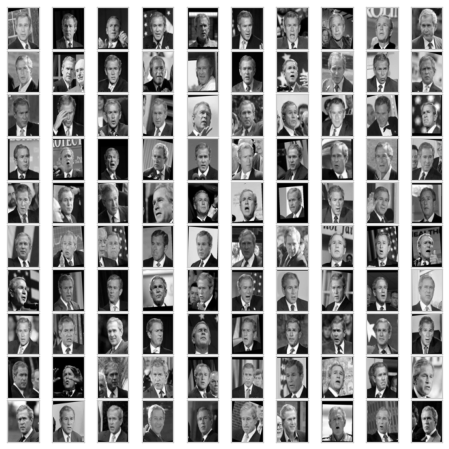

In [104]:
def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i], cmap='gray')
plot_faces(faces.images)

## PCA

In [105]:
#original data shape
X=faces.images.reshape(N,-1)
X.shape

(530, 2914)

In [107]:
pca = PCA(n_components=120, whiten=True)
data2 = pca.fit_transform(X)
data2.shape

(530, 120)

In [109]:
#% variance explained to help decide correct number of components
sum((pca.explained_variance_ratio_))

0.9244738091365434

## Use Akaike Information Criterion to select best number of components for GMM model

In [110]:
data2.shape[1]

120

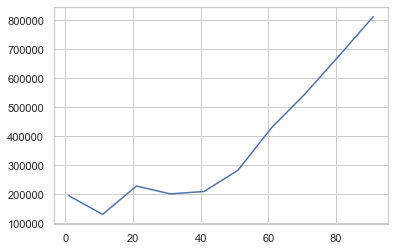

In [111]:
#fit GMM model with different components
n_components = np.arange(1, 100, 10)

models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data2).aic(data2) for model in models]
plt.plot(n_components, aics);

### AIC minimum with n components=10 

In [112]:
# Check for model convergence
gmm10 = GMM(n_components=10, covariance_type='full', random_state=0)
gmm10.fit(data2).converged_

True

Draw 100 new samples from GMM (gmm) <br>
The new data samples are in the 120-dimensional projected space

In [113]:
data_new, _ = gmm10.sample(100)
data_new.shape

(100, 120)

In [114]:
#shape of new data
data_new.shape

(100, 120)

## Transform images back to original space using PCA inverse transform and visualise

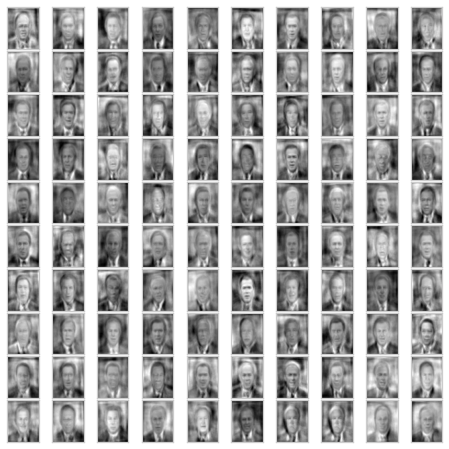

In [98]:
faces_new = pca.inverse_transform(data_new)
plot_faces(faces_new.reshape(-1,62, 47))

## Same process as above just with more data

In [116]:
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [117]:
N=faces.images.shape[0]
N

1560

In [118]:
M=faces.images.shape[1]*faces.images.shape[2]
M

2914

N images each with M pixels
N = 1560 and M = 2914 : N < M  <br>
Use PCA to reduce dimension to 120

In [120]:
X=faces.images.reshape(N,-1)
pca = PCA(n_components=120, whiten=True)
data = pca.fit_transform(X)
data.shape

(1560, 120)

In [121]:
#cumulative explained variance ratio
np.cumsum(pca.explained_variance_ratio_)[-1]

0.9028343

Fit multiple GMMs to data and use Akaike Information Criterion again to decide optimal number of components

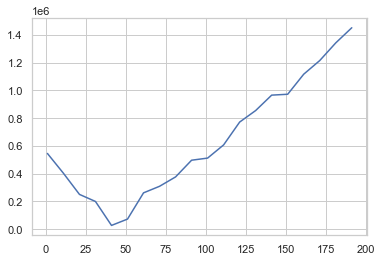

In [122]:
n_components = np.arange(1, 200, 10)

models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

AIC min around 41 components. <br>

In [125]:
n_components[aics.index(min(aics))]

41

In [126]:
gmm41 = GMM(n_components=n_components[aics.index(min(aics))], covariance_type='full', random_state=0)
gmm41.fit(data).converged_

True

Generate 100 new samples from this GMM

In [127]:
# generate new samples from above data
data_new, _ = gmm41.sample(100)
data_new.shape

(100, 120)

Transform the 100 new samples back to the original space

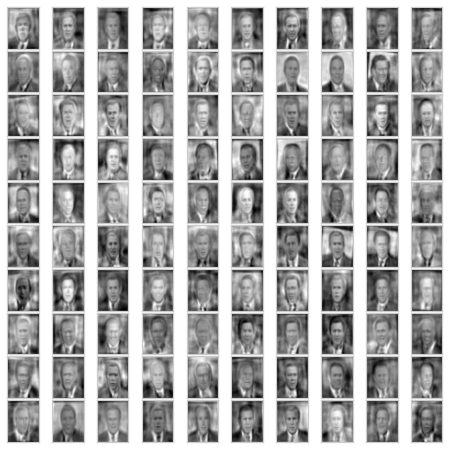

In [128]:
faces_new = pca.inverse_transform(data_new)
plot_faces(faces_new.reshape(-1,62, 47))